In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [84]:
house_price = pd.read_csv("Data/Housing_Iter_0-2/housing-classification-iter-0-2.csv")
house_price

In [178]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1460 non-null   int64  
 1   LotFrontage   1201 non-null   float64
 2   TotalBsmtSF   1460 non-null   int64  
 3   BedroomAbvGr  1460 non-null   int64  
 4   Fireplaces    1460 non-null   int64  
 5   PoolArea      1460 non-null   int64  
 6   GarageCars    1460 non-null   int64  
 7   WoodDeckSF    1460 non-null   int64  
 8   ScreenPorch   1460 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 102.8 KB


In [176]:
house_price.isna().sum()

LotArea           0
LotFrontage     259
TotalBsmtSF       0
BedroomAbvGr      0
Fireplaces        0
PoolArea          0
GarageCars        0
WoodDeckSF        0
ScreenPorch       0
dtype: int64

In [9]:
house_price.groupby("BedroomAbvGr")["Expensive"].value_counts()

BedroomAbvGr  Expensive
0             0              3
              1              3
1             0             41
              1              9
2             0            320
              1             38
3             0            702
              1            102
4             0            151
              1             62
5             0             18
              1              3
6             0              7
8             0              1
Name: Expensive, dtype: int64

In [11]:
house_price.groupby("Fireplaces")["Expensive"].value_counts()

Fireplaces  Expensive
0           0            680
            1             10
1           0            482
            1            168
2           0             78
            1             37
3           0              3
            1              2
Name: Expensive, dtype: int64

In [13]:
house_price.groupby("GarageCars")["Expensive"].value_counts()

GarageCars  Expensive
0           0             81
1           0            367
            1              2
2           0            738
            1             86
3           1            128
            0             53
4           0              4
            1              1
Name: Expensive, dtype: int64

In [31]:
house_price.groupby("PoolArea")["Expensive"].value_counts()

PoolArea  Expensive
0         0            1238
          1             215
480       0               1
512       0               1
519       0               1
555       1               1
576       0               1
648       0               1
738       1               1
Name: Expensive, dtype: int64

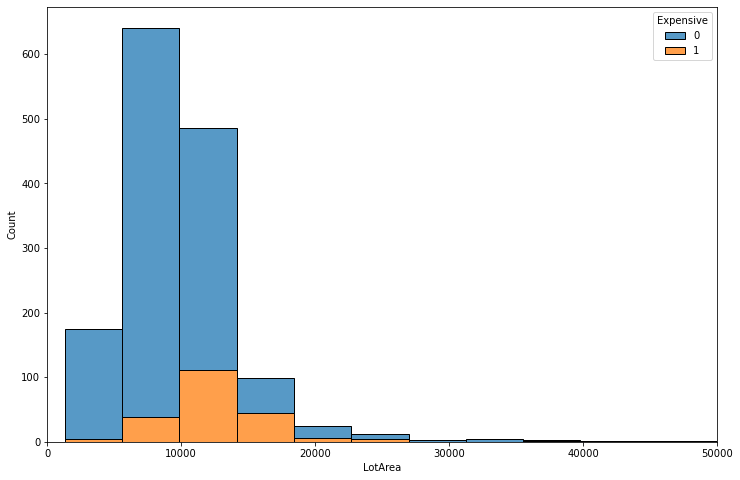

In [63]:
plt.subplots(figsize = (12, 8))
sns.histplot(data = house_price, x = "LotArea", hue = "Expensive", bins = 50, multiple = "stack");
plt.xlim(0, 50000);
plt.show();

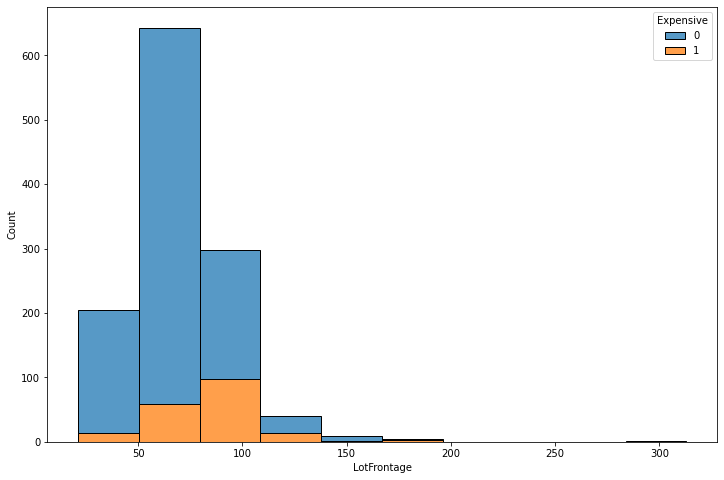

In [69]:
plt.subplots(figsize = (12, 8))
sns.histplot(data = house_price, x = "LotFrontage", hue = "Expensive", bins = 10, multiple = "stack");
plt.show();

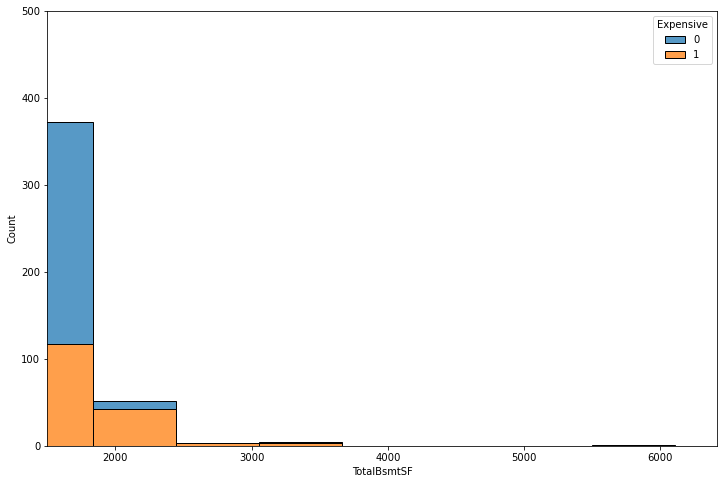

In [46]:
plt.subplots(figsize = (12, 8))
sns.histplot(data = house_price, x = "TotalBsmtSF", hue = "Expensive", bins = 10, multiple = "stack");
plt.xlim(1500,);
plt.ylim(0,500);
plt.show();

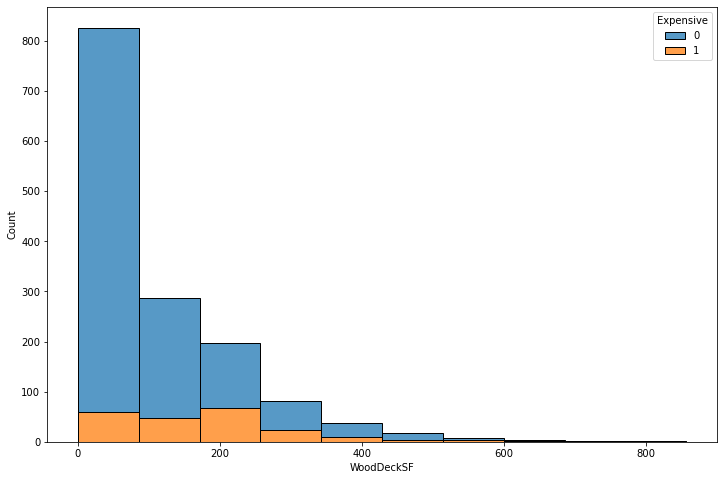

In [56]:
plt.subplots(figsize = (12, 8))
sns.histplot(data = house_price, x = "WoodDeckSF", hue = "Expensive", bins = 10, multiple = "stack");
plt.show();

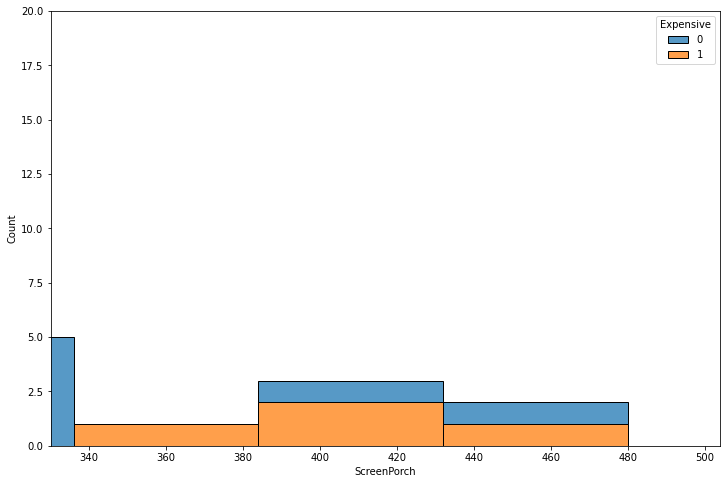

In [78]:
plt.subplots(figsize = (12, 8))
sns.histplot(data = house_price, x = "ScreenPorch", hue = "Expensive", bins = 10, multiple = "stack");
plt.xlim(330,);
plt.ylim(0,20);
plt.show();

In [86]:
y = house_price.pop("Expensive")

In [88]:
X = house_price.copy()
X

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
0,8450,65.0,856,3,0,0,2,0,0
1,9600,80.0,1262,3,1,0,2,298,0
2,11250,68.0,920,3,1,0,2,0,0
3,9550,60.0,756,3,1,0,3,0,0
4,14260,84.0,1145,4,1,0,3,192,0
...,...,...,...,...,...,...,...,...,...
1455,7917,62.0,953,3,1,0,2,0,0
1456,13175,85.0,1542,3,2,0,2,349,0
1457,9042,66.0,1152,4,2,0,1,0,0
1458,9717,68.0,1078,2,0,0,1,366,0


In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [179]:
def price_prediction(row):
    if row["GarageCars"] == 3:
        return True
    elif row["TotalBsmtSF"] > 2000:
        return True
    elif row["ScreenPorch"] >= 340 and row["ScreenPorch"] <= 430:
        return True
    else:
        return False

In [180]:
X_train_pred = X_train.assign(Prediction = X_train.apply(price_prediction, axis = 1))

In [98]:
X_train_pred.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Prediction
133,6853,NaN,1267,2,0,0,2,192,0,False
290,15611,120.0,1079,3,1,0,2,0,0,True
24,8246,NaN,1060,3,1,0,1,406,0,True
1093,9230,71.0,864,1,0,0,2,0,0,False
1288,5664,40.0,1501,2,1,0,2,212,0,True


In [181]:
train_accuracy = accuracy_score(y_true = y_train, y_pred = X_train_pred["Prediction"])
round(train_accuracy, 2)

0.9

In [170]:
X_test_pred = X_test.assign(Prediction = X_test.apply(price_prediction, axis = 1))

In [171]:
test_accuracy = accuracy_score(y_true = y_test, y_pred = X_test_pred["Prediction"])
round(test_accuracy, 2)

0.92